<a href="https://colab.research.google.com/github/kdcool98/Machine-Learning-Projects/blob/main/20%2B_Machine_Learning_Projects/Predicting_Compressive_Strength_Of_Concrete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools 

%matplotlib inline

## Importing the Dataset

In [2]:
dataset = pd.read_csv('CompressiveStrengthConcrete.csv')

In [3]:
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Renaming the Columns

In [4]:
dataset = dataset.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                                  'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                                  'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                                  'Water  (component 4)(kg in a m^3 mixture)':'water',
                                  'Superplasticizer (component 5)(kg in a m^3 mixture)':'superplastic',
                                  'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'coarseagg',
                                  'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                                  'Age (day)':'age',
                                  'Concrete compressive strength(MPa, megapascals) ':'strength'})

In [5]:
dataset.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
dataset.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [7]:
dataset.shape

(1030, 9)

In [8]:
dataset.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [9]:
dataset.describe().T # T : To transpose the table

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Exploratory Data Analysis

#### Cement :

In [10]:
# Calculating the Quartiles

from scipy import stats

Q1 = dataset['cement'].quantile(q=0.25)
Q3 = dataset['cement'].quantile(q=0.75)

print('1st Quartile(Q1) : ',Q1)
print('3rd Quartile(Q3) : ',Q3)
print('Interquartile Range (IQR) is : ', stats.iqr(dataset['cement']))

1st Quartile(Q1) :  192.375
3rd Quartile(Q3) :  350.0
Interquartile Range (IQR) is :  157.625


###### Outlier Detection from Interquartile Range

In [11]:
L_outlier_limit = Q1 - 1.5*(Q3-Q1)
U_outlier_limit = Q3 + 1.5*(Q3-Q1)

print('Lower Outliers Limit in Cement : {0}'.format(L_outlier_limit))
print('Upper Outliers Limit in Cement : {0}'.format(U_outlier_limit))

Lower Outliers Limit in Cement : -44.0625
Upper Outliers Limit in Cement : 586.4375


In [12]:
# Checking the presence of outliers with the upper and lower limits

print('Number of upper outliers in cement : {}'.format(dataset[dataset['ash']>586.4375]['cement'].count()))
print('Number of lower outliers in cement : {}'.format(dataset[dataset['ash']<-44.0625]['cement'].count()))

print('Lowest : {}'.format(dataset['cement'].min()))
print('Highest : {}'.format(dataset['cement'].max()))

Number of upper outliers in cement : 0
Number of lower outliers in cement : 0
Lowest : 102.0
Highest : 540.0


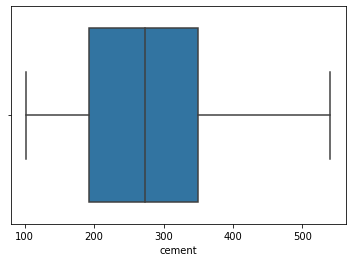

In [13]:
# Cement attribute Distribution

sns.boxplot(x='cement', data=dataset) # If there were any outliers, we would have seen some extra points beyond the limits.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cement')

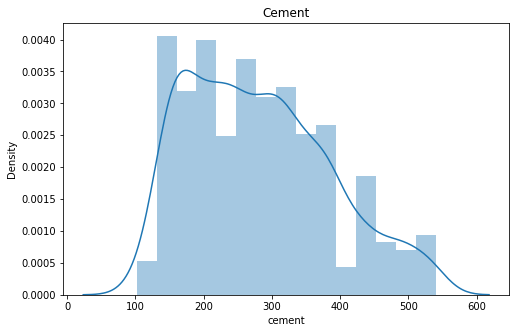

In [14]:
plt.figure(figsize=(8,5))
sns.distplot(dataset['cement']).set_title("Cement")

#### Water :

In [15]:
w_Q1 = dataset['water'].quantile(q=0.25)
w_Q3 = dataset['water'].quantile(q=0.75)

print('1st Quartile(Q1) : ',w_Q1)
print('3rd Quartile(Q3) : ',w_Q3)
print('Interquartile Range (IQR) is : ', stats.iqr(dataset['water']))

1st Quartile(Q1) :  164.9
3rd Quartile(Q3) :  192.0
Interquartile Range (IQR) is :  27.099999999999994


In [16]:
WL_outlier_limit = w_Q1 - 1.5*(w_Q3-w_Q1)
WU_outlier_limit = w_Q3 + 1.5*(w_Q3-w_Q1)

print('Lower Outliers Limit in water : {0}'.format(WL_outlier_limit))
print('Upper Outliers Limit in water : {0}'.format(WU_outlier_limit))

Lower Outliers Limit in water : 124.25000000000001
Upper Outliers Limit in water : 232.64999999999998


In [17]:
# Checking the presence of outliers with the upper and lower limits

print('Number of upper outliers in water : {}'.format(dataset[dataset['water']>232.65]['water'].count()))
print('Number of lower outliers in water : {}'.format(dataset[dataset['water']<124.25]['water'].count()))

print('Lowest : {}'.format(dataset['water'].min()))
print('Highest : {}'.format(dataset['water'].max()))

Number of upper outliers in water : 4
Number of lower outliers in water : 5
Lowest : 121.8
Highest : 247.0


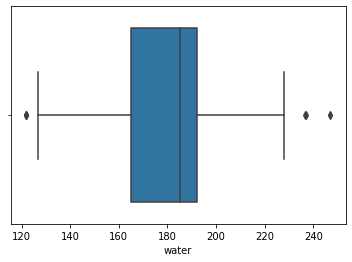

In [18]:
sns.boxplot(x='water', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Water')

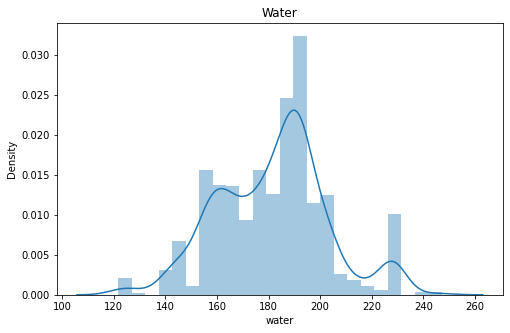

In [19]:
plt.figure(figsize=(8,5))
sns.distplot(dataset['water']).set_title("Water")

#### Slag :

In [20]:
s_Q1 = dataset['slag'].quantile(q=0.25)
s_Q3 = dataset['slag'].quantile(q=0.75)

print('1st Quartile(Q1) : ',s_Q1)
print('3rd Quartile(Q3) : ',s_Q3)
print('Interquartile Range (IQR) is : ', stats.iqr(dataset['slag']))

1st Quartile(Q1) :  0.0
3rd Quartile(Q3) :  142.95
Interquartile Range (IQR) is :  142.95


In [21]:
SL_outlier_limit = s_Q1 - 1.5*(s_Q3-s_Q1)
SU_outlier_limit = s_Q3 + 1.5*(s_Q3-s_Q1)

print('Lower Outliers Limit in slag : {0}'.format(SL_outlier_limit))
print('Upper Outliers Limit in slag : {0}'.format(SU_outlier_limit))

Lower Outliers Limit in slag : -214.42499999999998
Upper Outliers Limit in slag : 357.375


In [22]:
# Checking the presence of outliers with the upper and lower limits

print('Number of upper outliers in slag : {}'.format(dataset[dataset['slag']>357.375]['slag'].count()))
print('Number of lower outliers in slag : {}'.format(dataset[dataset['slag']<-214.425]['slag'].count()))

print('Lowest : {}'.format(dataset['slag'].min()))
print('Highest : {}'.format(dataset['slag'].max()))

Number of upper outliers in slag : 2
Number of lower outliers in slag : 0
Lowest : 0.0
Highest : 359.4


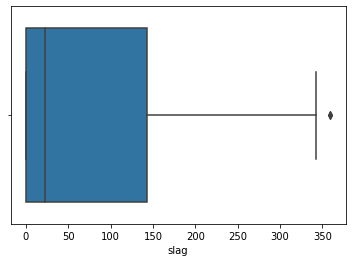

In [23]:
sns.boxplot(x='slag', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Slag')

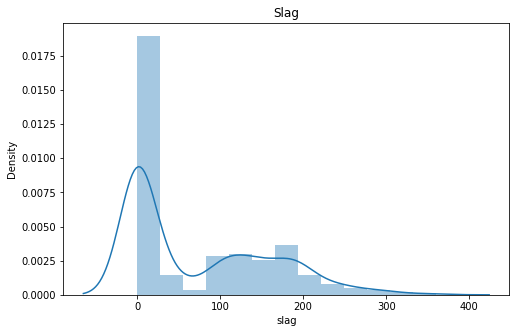

In [24]:
plt.figure(figsize=(8,5))
sns.distplot(dataset['slag']).set_title("Slag")

#### Ash :

In [25]:
a_Q1 = dataset['ash'].quantile(q=0.25)
a_Q3 = dataset['ash'].quantile(q=0.75)

print('1st Quartile(Q1) : ',a_Q1)
print('3rd Quartile(Q3) : ',a_Q3)
print('Interquartile Range (IQR) is : ', stats.iqr(dataset['ash']))

1st Quartile(Q1) :  0.0
3rd Quartile(Q3) :  118.3
Interquartile Range (IQR) is :  118.3


In [26]:
AL_outlier_limit = a_Q1 - 1.5*(a_Q3-a_Q1)
AU_outlier_limit = a_Q3 + 1.5*(a_Q3-a_Q1)

print('Lower Outliers Limit in ash : {0}'.format(AL_outlier_limit))
print('Upper Outliers Limit in ash : {0}'.format(AU_outlier_limit))

Lower Outliers Limit in ash : -177.45
Upper Outliers Limit in ash : 295.75


In [27]:
# Checking the presence of outliers with the upper and lower limits

print('Number of upper outliers in ash : {}'.format(dataset[dataset['ash']>295.75]['ash'].count()))
print('Number of lower outliers in ash : {}'.format(dataset[dataset['ash']<-177.45]['ash'].count()))

print('Lowest : {}'.format(dataset['ash'].min()))
print('Highest : {}'.format(dataset['ash'].max()))

Number of upper outliers in ash : 0
Number of lower outliers in ash : 0
Lowest : 0.0
Highest : 200.1


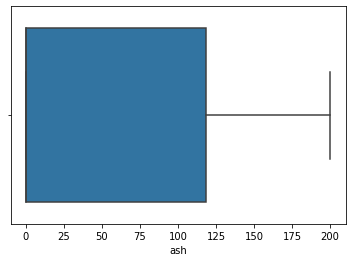

In [28]:
sns.boxplot(x='ash', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ash')

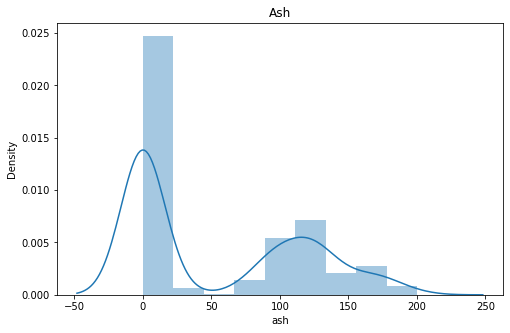

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(dataset['ash']).set_title('Ash')

#### Superplastic :

In [30]:
sp_Q1 = dataset['superplastic'].quantile(q=0.25)
sp_Q3 = dataset['superplastic'].quantile(q=0.75)

print('1st Quartile(Q1) : ',sp_Q1)
print('3rd Quartile(Q3) : ',sp_Q3)
print('Interquartile Range (IQR) is : ', stats.iqr(dataset['superplastic']))

1st Quartile(Q1) :  0.0
3rd Quartile(Q3) :  10.2
Interquartile Range (IQR) is :  10.2


In [31]:
SPL_outlier_limit = sp_Q1 - 1.5*(sp_Q3-sp_Q1)
SPU_outlier_limit = sp_Q3 + 1.5*(sp_Q3-sp_Q1)

print('Lower Outliers Limit in superplastic : {0}'.format(SPL_outlier_limit))
print('Upper Outliers Limit in superplastic : {0}'.format(SPU_outlier_limit))

Lower Outliers Limit in superplastic : -15.299999999999999
Upper Outliers Limit in superplastic : 25.5


In [32]:
# Checking the presence of outliers with the upper and lower limits

print('Number of upper outliers in superplastic : {}'.format(dataset[dataset['superplastic']>25.5]['superplastic'].count()))
print('Number of lower outliers in superplastic : {}'.format(dataset[dataset['superplastic']<-15.3]['superplastic'].count()))

print('Lowest : {}'.format(dataset['superplastic'].min()))
print('Highest : {}'.format(dataset['superplastic'].max()))

Number of upper outliers in superplastic : 10
Number of lower outliers in superplastic : 0
Lowest : 0.0
Highest : 32.2


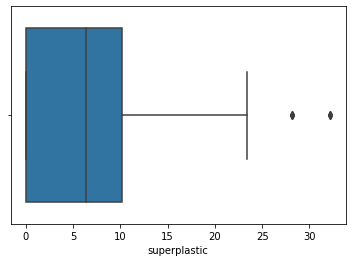

In [33]:
sns.boxplot(x='superplastic', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Superplastic')

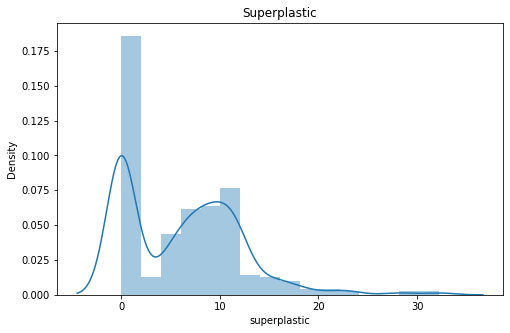

In [34]:
plt.figure(figsize=(8,5))
sns.distplot(dataset['superplastic']).set_title('Superplastic')

#### Coarseagg :

In [35]:
c_Q1 = dataset['coarseagg'].quantile(q=0.25)
c_Q3 = dataset['coarseagg'].quantile(q=0.75)

print('1st Quartile(Q1) : ',c_Q1)
print('3rd Quartile(Q3) : ',c_Q3)
print('Interquartile Range (IQR) is : ', stats.iqr(dataset['coarseagg']))

1st Quartile(Q1) :  932.0
3rd Quartile(Q3) :  1029.4
Interquartile Range (IQR) is :  97.40000000000009


In [36]:
CL_outlier_limit = c_Q1 - 1.5*(c_Q3-c_Q1)
CU_outlier_limit = c_Q3 + 1.5*(c_Q3-c_Q1)

print('Lower Outliers Limit in coarseagg : {0}'.format(CL_outlier_limit))
print('Upper Outliers Limit in coarseagg : {0}'.format(CU_outlier_limit))

Lower Outliers Limit in coarseagg : 785.8999999999999
Upper Outliers Limit in coarseagg : 1175.5000000000002


In [37]:
# Checking the presence of outliers with the upper and lower limits

print('Number of upper outliers in coarseagg : {}'.format(dataset[dataset['coarseagg']>1175.5]['coarseagg'].count()))
print('Number of lower outliers in coarseagg : {}'.format(dataset[dataset['coarseagg']<785.9]['coarseagg'].count()))

print('Lowest : {}'.format(dataset['coarseagg'].min()))
print('Highest : {}'.format(dataset['coarseagg'].max()))

Number of upper outliers in coarseagg : 0
Number of lower outliers in coarseagg : 0
Lowest : 801.0
Highest : 1145.0


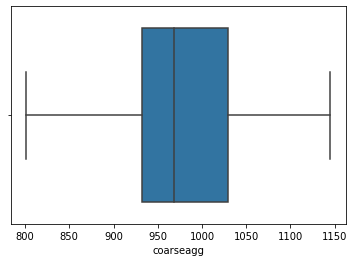

In [38]:
sns.boxplot(x='coarseagg', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Coarseagg')

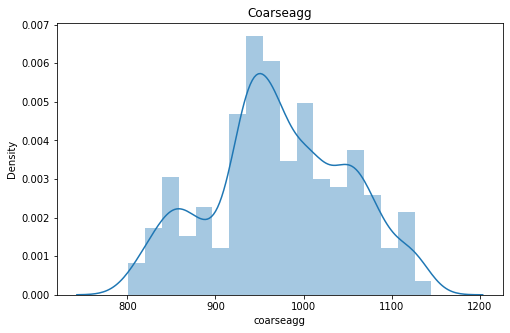

In [39]:
plt.figure(figsize=(8,5))
sns.distplot(dataset['coarseagg']).set_title('Coarseagg')

#### Fineagg :

In [40]:
f_Q1 = dataset['fineagg'].quantile(q=0.25)
f_Q3 = dataset['fineagg'].quantile(q=0.75)

print('1st Quartile(Q1) : ',f_Q1)
print('3rd Quartile(Q3) : ',f_Q3)
print('Interquartile Range (IQR) is : ', stats.iqr(dataset['fineagg']))

1st Quartile(Q1) :  730.9499999999999
3rd Quartile(Q3) :  824.0
Interquartile Range (IQR) is :  93.05000000000007


In [41]:
FL_outlier_limit = f_Q1 - 1.5*(f_Q3-f_Q1)
FU_outlier_limit = f_Q3 + 1.5*(f_Q3-f_Q1)

print('Lower Outliers Limit in fineagg : {0}'.format(FL_outlier_limit))
print('Upper Outliers Limit in fineagg : {0}'.format(FU_outlier_limit))

Lower Outliers Limit in fineagg : 591.3749999999998
Upper Outliers Limit in fineagg : 963.575


In [42]:
# Checking the presence of outliers with the upper and lower limits

print('Number of upper outliers in fineagg : {}'.format(dataset[dataset['fineagg']>963.575]['fineagg'].count()))
print('Number of lower outliers in fineagg : {}'.format(dataset[dataset['fineagg']<591.375]['fineagg'].count()))

print('Lowest : {}'.format(dataset['fineagg'].min()))
print('Highest : {}'.format(dataset['fineagg'].max()))

Number of upper outliers in fineagg : 5
Number of lower outliers in fineagg : 0
Lowest : 594.0
Highest : 992.6


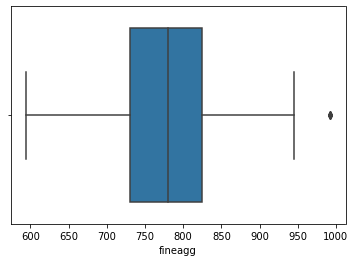

In [43]:
sns.boxplot(x='fineagg', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fineagg')

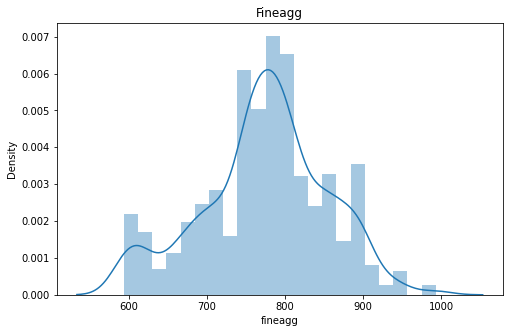

In [44]:
plt.figure(figsize=(8,5))
sns.distplot(dataset['fineagg']).set_title('Fineagg')

#### Age :

In [45]:
age_Q1 = dataset['age'].quantile(q=0.25)
age_Q3 = dataset['age'].quantile(q=0.75)

print('1st Quartile(Q1) : ',age_Q1)
print('3rd Quartile(Q3) : ',age_Q3)
print('Interquartile Range (IQR) is : ', stats.iqr(dataset['age']))

1st Quartile(Q1) :  7.0
3rd Quartile(Q3) :  56.0
Interquartile Range (IQR) is :  49.0


In [46]:
AGE_L_outlier_limit = age_Q1 - 1.5*(age_Q3-age_Q1)
AGE_U_outlier_limit = age_Q3 + 1.5*(age_Q3-age_Q1)

print('Lower Outliers Limit in age : {0}'.format(AGE_L_outlier_limit))
print('Upper Outliers Limit in age : {0}'.format(AGE_U_outlier_limit))

Lower Outliers Limit in age : -66.5
Upper Outliers Limit in age : 129.5


In [47]:
# Checking the presence of outliers with the upper and lower limits

print('Number of upper outliers in age : {}'.format(dataset[dataset['age']>129.5]['age'].count()))
print('Number of lower outliers in age : {}'.format(dataset[dataset['age']<-66.5]['age'].count()))

print('Lowest : {}'.format(dataset['age'].min()))
print('Highest : {}'.format(dataset['age'].max()))

Number of upper outliers in age : 59
Number of lower outliers in age : 0
Lowest : 1
Highest : 365


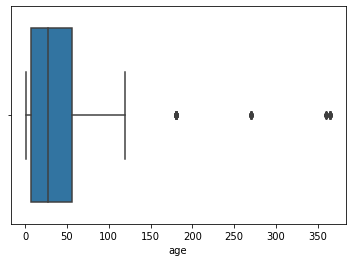

In [48]:
sns.boxplot(x='age', data=dataset)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

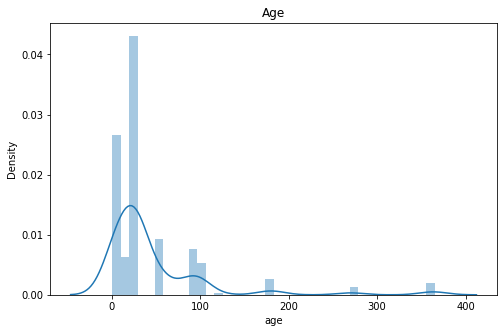

In [49]:
plt.figure(figsize=(8,5))
sns.distplot(dataset['age']).set_title('Age')

## Multivariate Analysis

#### Distplot :

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

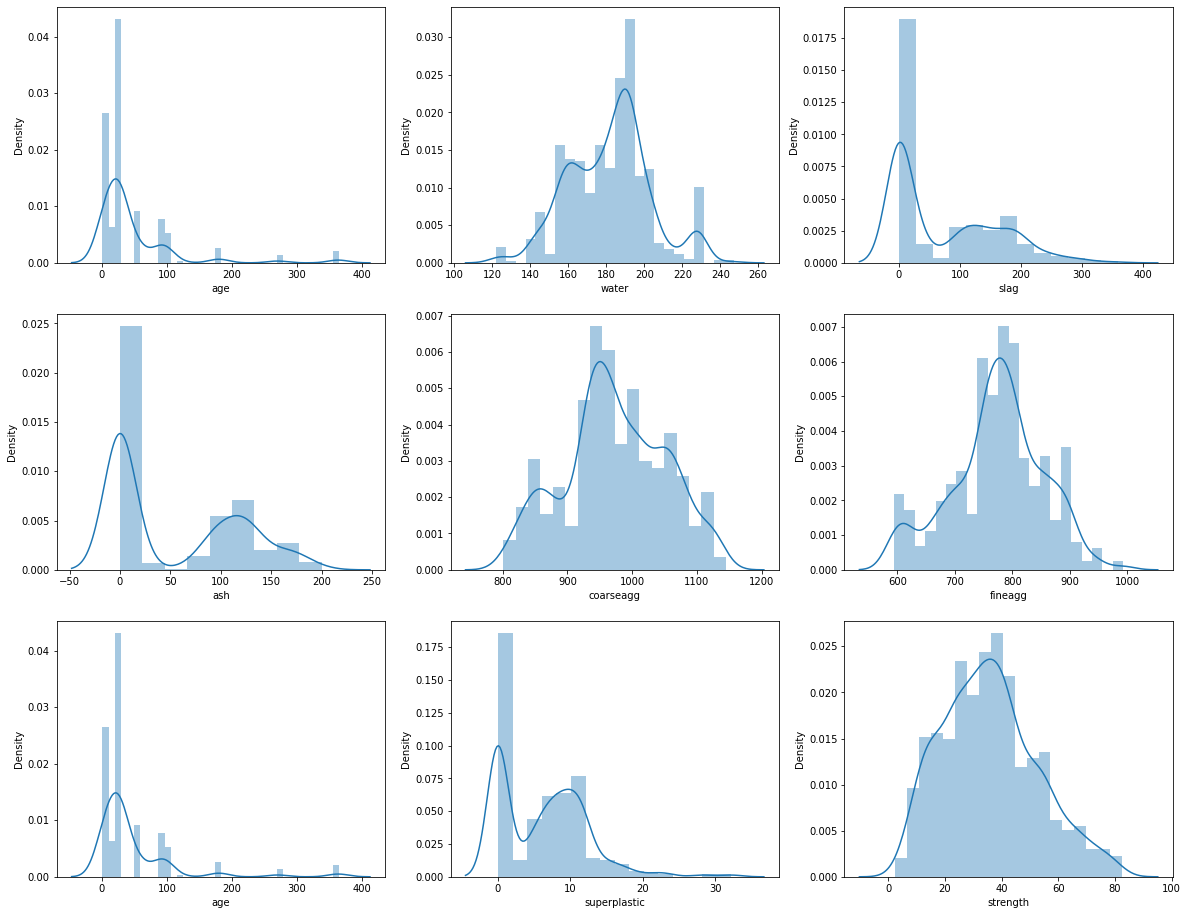

In [50]:
# Distplot

fig, ax2 = plt.subplots(3, 3, figsize=(20,16))
sns.distplot(dataset['age'], ax=ax2[0][0])
sns.distplot(dataset['water'], ax=ax2[0][1])
sns.distplot(dataset['slag'], ax=ax2[0][2])
sns.distplot(dataset['ash'], ax=ax2[1][0])
sns.distplot(dataset['superplastic'], ax=ax2[2][1])
sns.distplot(dataset['coarseagg'], ax=ax2[1][1])
sns.distplot(dataset['fineagg'], ax=ax2[1][2])
sns.distplot(dataset['age'], ax=ax2[2][0])
sns.distplot(dataset['strength'], ax=ax2[2][2])

#### Pairplot :

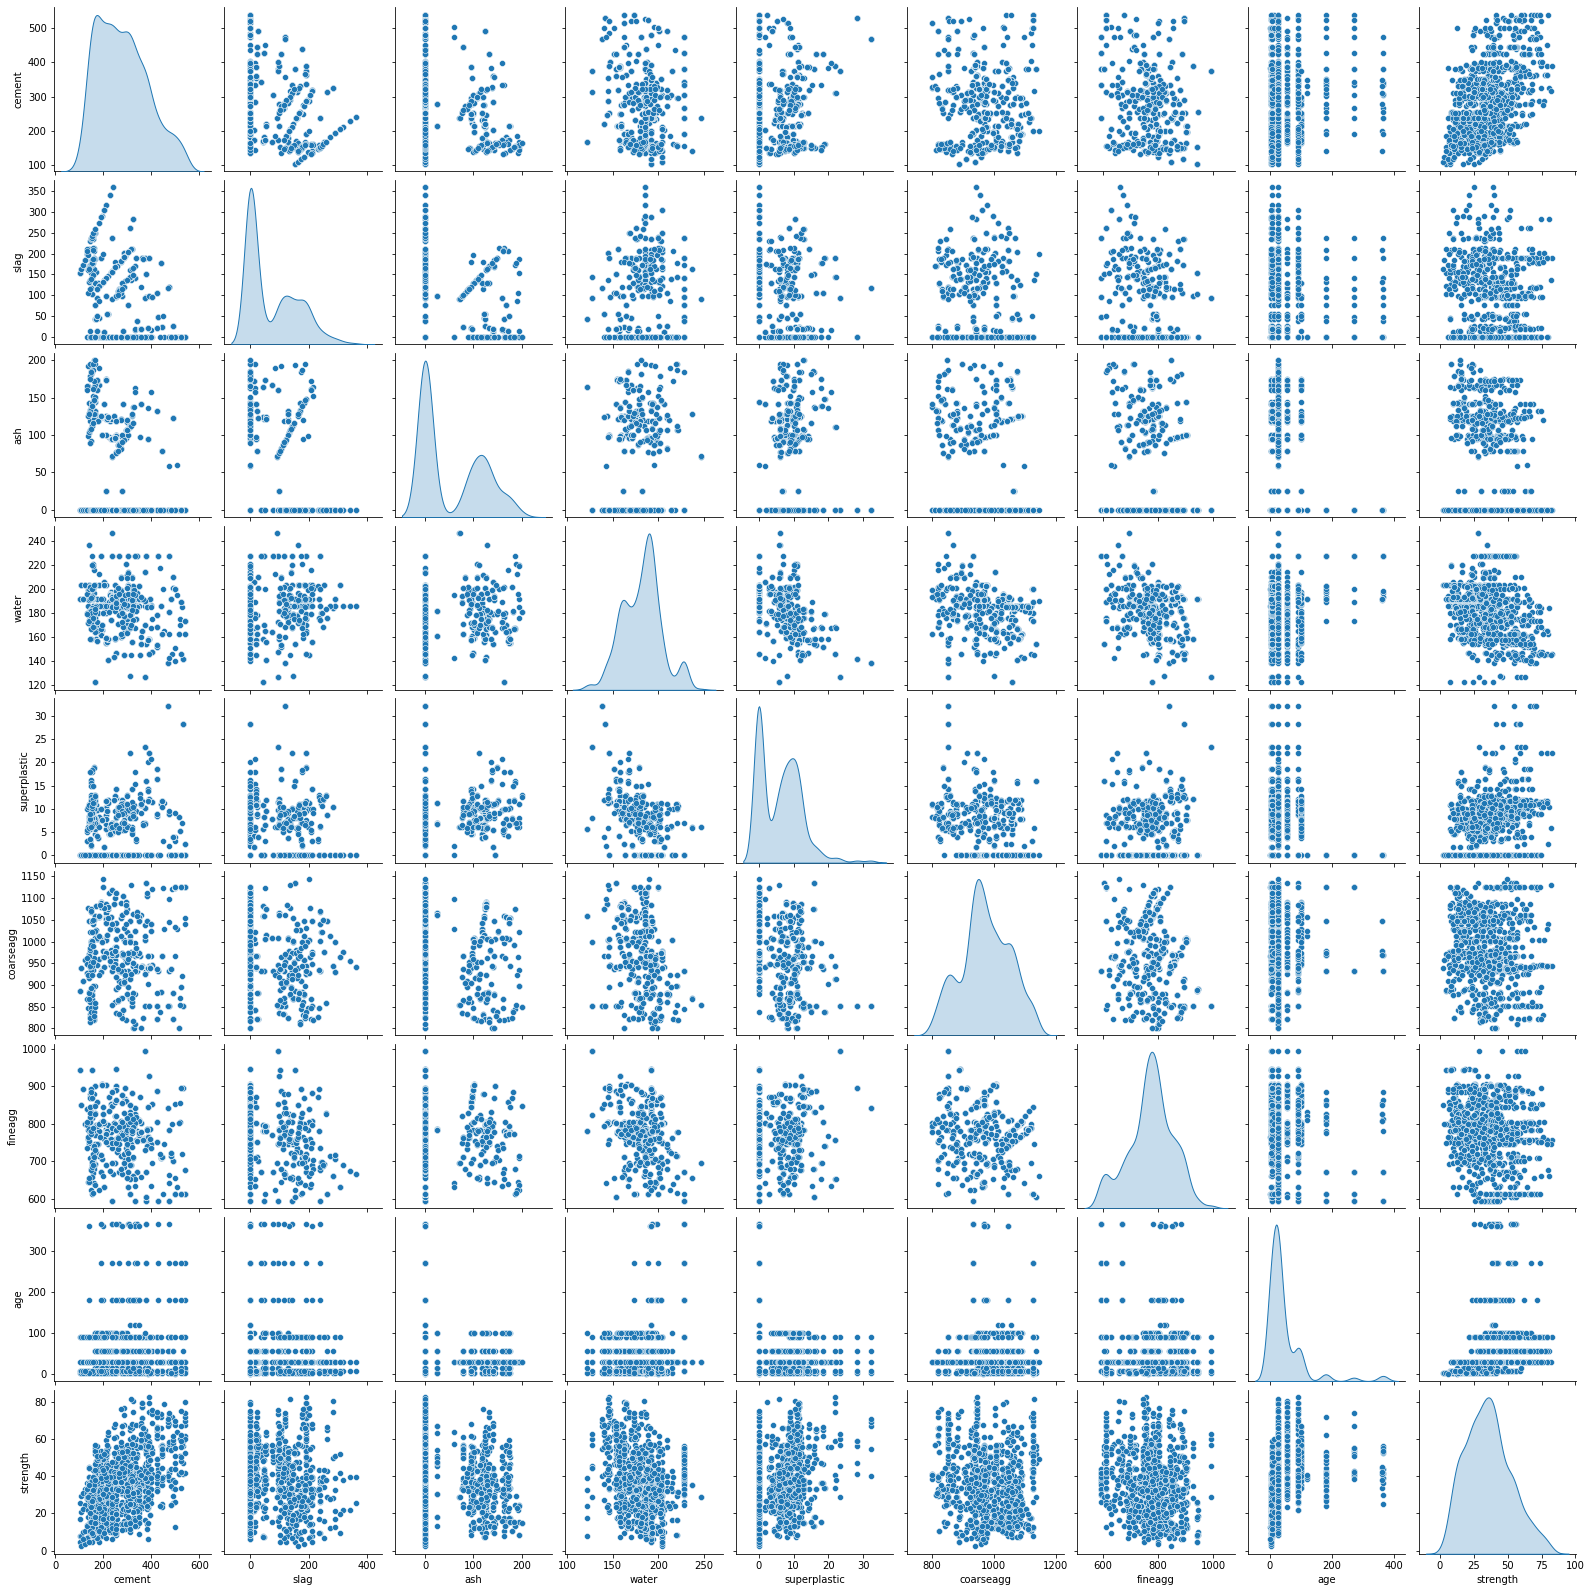

In [51]:
# Plot Density curve instead of histogram in diagonal

sns.pairplot(dataset, diag_kind='kde')

#### Heatmap - Correlation between variables

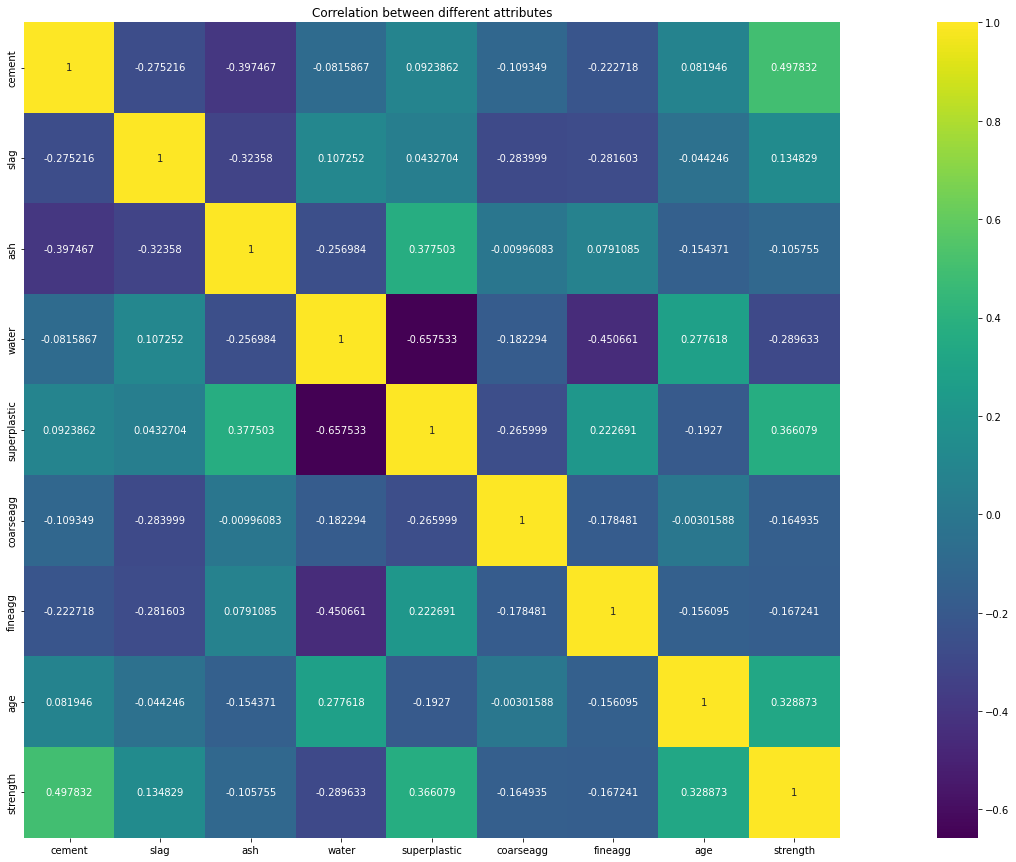

In [52]:
plt.figure(figsize=(35,15))

sns.heatmap(dataset.corr(), vmax=1, square=True, annot=True, cmap='viridis', fmt='g')
plt.title('Correlation between different attributes')
plt.show()

#### Boxplot :

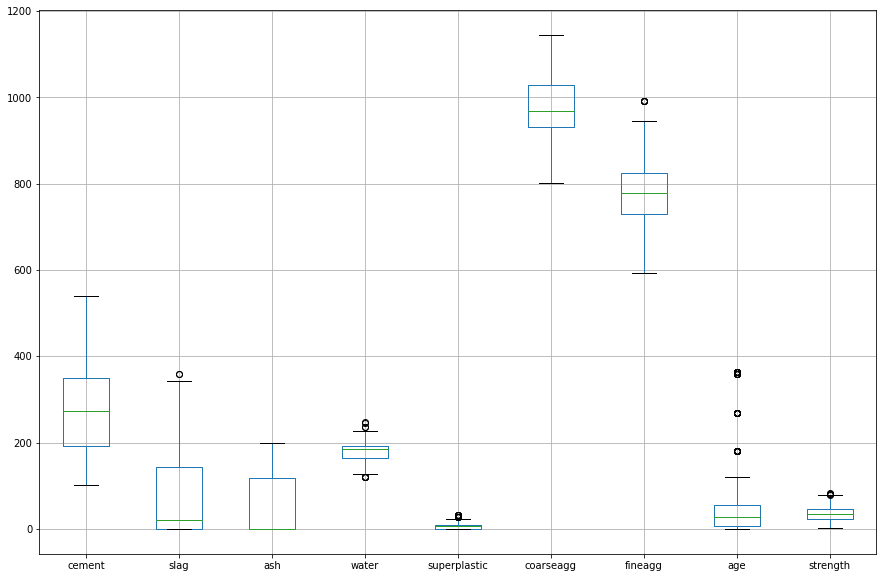

In [53]:
dataset.boxplot(figsize=(15,10))

#### Checking for number of outliers :

In [54]:
print('Outliers in cement : {}'.format(dataset[((dataset.cement-dataset.cement.mean())/dataset.cement.std()).abs()>3]['cement'].count()))
print('Outliers in slag : {}'.format(dataset[((dataset.slag-dataset.slag.mean())/dataset.slag.std()).abs()>3]['slag'].count()))
print('Outliers in ash : {}'.format(dataset[((dataset.ash-dataset.ash.mean())/dataset.ash.std()).abs()>3]['ash'].count()))
print('Outliers in water : {}'.format(dataset[((dataset.water-dataset.water.mean())/dataset.water.std()).abs()>3]['water'].count()))
print('Outliers in superplastic : {}'.format(dataset[((dataset.superplastic-dataset.superplastic.mean())/dataset.superplastic.std()).abs()>3]['superplastic'].count()))
print('Outliers in coarseagg : {}'.format(dataset[((dataset.coarseagg-dataset.coarseagg.mean())/dataset.coarseagg.std()).abs()>3]['coarseagg'].count()))
print('Outliers in fineagg : {}'.format(dataset[((dataset.fineagg-dataset.fineagg.mean())/dataset.fineagg.std()).abs()>3]['fineagg'].count()))
print('Outliers in age : {}'.format(dataset[((dataset.age-dataset.age.mean())/dataset.age.std()).abs()>3]['age'].count()))


Outliers in cement : 0
Outliers in slag : 4
Outliers in ash : 0
Outliers in water : 2
Outliers in superplastic : 10
Outliers in coarseagg : 0
Outliers in fineagg : 0
Outliers in age : 33


#### Taking care of Outliers by replacing them with Median of the columns :

In [55]:
for column in dataset.columns[:-1]:
  Q1 = dataset[column].quantile(0.25)
  Q3 = dataset[column].quantile(0.75)
  IQR = Q3 - Q1

  L_limit = Q1 - 1.5*IQR
  U_limit = Q3 + 1.5*IQR
  dataset.loc[(dataset[column] < L_limit) | (dataset[column] > U_limit), column] = dataset[column].median()

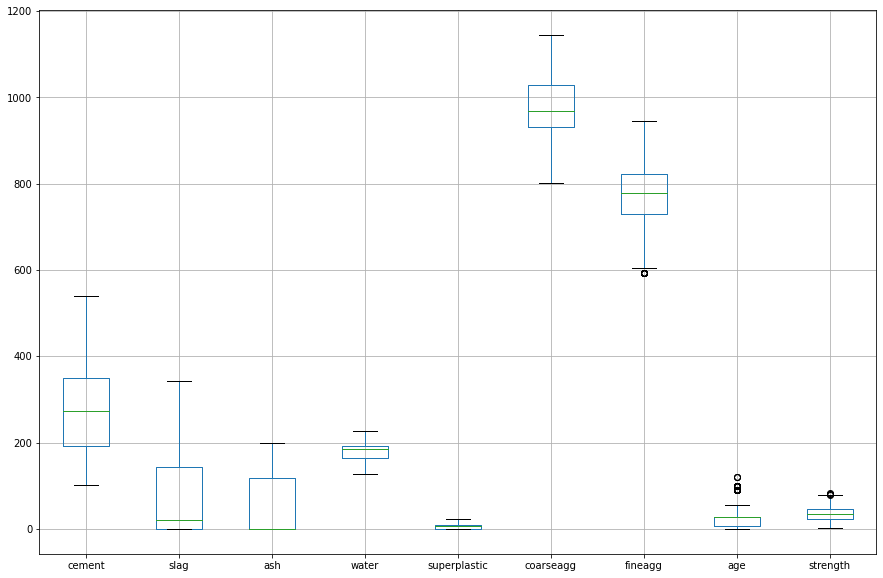

In [56]:
dataset.boxplot(figsize=(15,10))

## Feature Engineering and Model Building :

In [57]:
dataset.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


#### Splitting the dataset into Dependent and Independent Variable :

In [58]:
X = dataset.drop('strength', axis=1)
y = dataset['strength']

In [59]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_dataset = pd.DataFrame(Xscaled, columns=dataset.columns)

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.3, random_state=1)

## Building Different Models :

### Random Forest :

In [61]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
predictions = model.predict(X_test)

In [63]:
predictions

array([22.6039    , 13.4845    , 22.6723    , 13.2225    , 31.7794869 ,
       63.1102    , 20.2263    , 50.46362786, 40.9211    , 19.3097    ,
       37.4282    , 13.8926    , 39.02238333, 32.51761667, 11.9609    ,
       27.5491    , 34.83821774, 54.838     , 61.564     , 30.7481    ,
       25.572     , 51.1362    , 15.6823    , 59.1782    , 63.70435833,
       43.44476667, 32.92543333, 33.6608    , 35.1382    , 13.0262    ,
       38.892225  , 51.70408333, 31.12271167, 20.59125   , 34.17873333,
       37.947     , 16.0009    , 27.91052   , 24.3078    , 11.0954    ,
       31.835     , 15.3803    , 48.43981667, 37.62843333, 30.7419    ,
       28.0412    , 32.75035   , 23.7763    , 32.63389167, 50.5561    ,
       26.45985667, 34.61545833, 62.0376    , 53.0891    , 59.927525  ,
        9.0124    , 30.6248    , 22.9807    , 32.8163    , 43.943     ,
       45.44057917, 39.89382333, 50.56978   , 49.1787    , 27.1103    ,
       34.70425   , 62.0376    , 37.3712    , 49.25079   , 27.20

#### Evaluating model preformance on Training Data :

In [64]:
model.score(X_train, y_train)

0.981429746678777

#### Evaluating model performance on Testing Data :

In [65]:
model.score(X_test, y_test)

0.879072703489295

In [66]:
from sklearn.metrics import r2_score

acc_R = r2_score(y_test, predictions)
print('R2 Score : {}'.format(acc_R))

R2 Score : 0.879072703489295


In [67]:
# Evaluating the Mean Squared Error which measures the error between the predicted and he actual values.

from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, predictions))

31.69591497268575


#### Storing the accuracy results for each model in a dataframe for final comparision : 



In [68]:
results_1 = pd.DataFrame({'Algorithm':['Random Forest'], 'Accuracy':acc_R}, index={1})
results = results_1[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
1,Random Forest,0.879073


#### KFold Cross Validation :

In [69]:
from sklearn.model_selection import KFold, cross_val_score

k = 20

kfold = KFold(n_splits = k, random_state = 70)
K_results = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(abs(K_results))

print('Mean Accuracy : ', accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Mean Accuracy :  0.7619767257324013


#### Storing KFold Cross Validation Scores in a DataFrame for final comparision :

In [70]:
random_re = pd.DataFrame({'Algorithm' : ['Random Forest Regressor K_Fold'], 'Accuracy' : [accuracy]}, index={'2'})
results = pd.concat([results, random_re])
results = results[['Algorithm', 'Accuracy']]

print(results)

                        Algorithm  Accuracy
1                   Random Forest  0.879073
2  Random Forest Regressor K_Fold  0.761977


### Gradient Boosting Regressor :

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
predictions = model.predict(X_test)
predictions

array([21.04477264, 11.0540898 , 24.93802964, 15.09706139, 34.25572945,
       64.58199108, 16.88267942, 46.91376267, 39.69978845, 20.29262918,
       35.21289911, 14.95686266, 36.78184264, 30.85601521,  7.34770117,
       27.6408574 , 35.03051287, 59.76391896, 56.14803812, 33.05149908,
       21.84076414, 52.1361642 , 17.67671645, 62.24226368, 59.23600929,
       41.13211954, 34.07364711, 32.87163905, 36.03840606, 13.81397028,
       43.34066562, 54.02772706, 30.87924056, 25.33567063, 35.32248404,
       37.77816301, 17.74127717, 28.27629849, 23.63996804, 17.16484579,
       39.75273174, 14.35494827, 46.99056601, 36.73502204, 32.72559266,
       27.46629941, 34.94034042, 25.86784887, 32.36979266, 51.89009464,
       26.60811278, 37.30573428, 55.57383723, 45.00487233, 57.58443538,
        8.83975697, 36.60960573, 22.05773918, 31.39855399, 44.65348367,
       43.29209558, 41.41563669, 52.7534638 , 48.72456403, 22.22532404,
       35.38823538, 55.57383723, 35.4237606 , 40.95674816, 27.40

In [73]:
model.score(X_train, y_train)

0.947736861039059

In [74]:
acc_G = r2_score(y_test, predictions)
print(acc_G)

0.8800623369848515


In [75]:
model.score(X_test, y_test)

0.8800623369848515

In [76]:
mean_squared_error(y_test, predictions)

31.436524909115583

#### Storing the accuracy results for each model in a dataframe for final comparision :

In [77]:
gradient_re = pd.DataFrame({'Algorithm':['Gradient Boosting Regressor'], 'Accuracy':[acc_G]}, index={'3'})
results = pd.concat([results, gradient_re])
results = results[['Algorithm', 'Accuracy']]
results

,Algorithm,Accuracy
1,Random Forest,0.879073
2,Random Forest Regressor K_Fold,0.761977
3,Gradient Boosting Regressor,0.880062


#### KFold Cross Validation :

In [78]:
k = 20
kfold = KFold(n_splits = k, random_state = 70)
results_3 = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(abs(results_3))
print(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.769458497121861


In [79]:
gradient_k = pd.DataFrame({'Algorithm':['Gradient Boost Regressor K_Fold'], 'Accuracy':[accuracy]}, index={'4'})
results = pd.concat([results, gradient_k])
results = results[['Algorithm', 'Accuracy']]
print(results)

                         Algorithm  Accuracy
1                    Random Forest  0.879073
2   Random Forest Regressor K_Fold  0.761977
3      Gradient Boosting Regressor  0.880062
4  Gradient Boost Regressor K_Fold  0.769458


### Ada Boosting Regressor :

In [80]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [81]:
predictions = model.predict(X_test)

In [82]:
model.score(X_train, y_train)

0.822838267319194

In [83]:
model.score(X_test, y_test)

0.7451812144192994

In [84]:
acc_ADA = r2_score(y_test, predictions)
acc_ADA

0.7451812144192994

In [85]:
mean_squared_error(y_test, predictions)

66.78983814455773

In [86]:
acc_Ada = pd.DataFrame({'Algorithm':['Ada Boosting Regressor'], 'Accuracy':[acc_ADA]}, index={'5'})
results = pd.concat([results, acc_Ada])
results = results[['Algorithm', 'Accuracy']]
print(results)

                         Algorithm  Accuracy
1                    Random Forest  0.879073
2   Random Forest Regressor K_Fold  0.761977
3      Gradient Boosting Regressor  0.880062
4  Gradient Boost Regressor K_Fold  0.769458
5           Ada Boosting Regressor  0.745181


#### KFold Cross Validation :

In [87]:
k = 20
kfold = KFold(n_splits = k, random_state = 70)
results_4 = cross_val_score(model, X, y, cv = kfold)
accuracy = np.mean(abs(results_4))
print(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.5794438890677936


In [88]:
acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boosting Regressor K_Fold'], 'Accuracy':[accuracy]}, index={'6'})
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm', 'Accuracy']]
print(results)

                         Algorithm  Accuracy
1                    Random Forest  0.879073
2   Random Forest Regressor K_Fold  0.761977
3      Gradient Boosting Regressor  0.880062
4  Gradient Boost Regressor K_Fold  0.769458
5           Ada Boosting Regressor  0.745181
6    Ada Boosting Regressor K_Fold  0.579444


### KNN Regressor :

In [89]:
# Checking for different values of neighbors to determine the best number of 'k'.

from sklearn.neighbors import KNeighborsRegressor

diff_k = []
for i in range(1,45) :
  knn = KNeighborsRegressor(n_neighbors = i)
  knn.fit(X_train, y_train)
  prediction_i = knn.predict(X_test)
  diff_k.append(np.mean(prediction_i!=y_test))

Text(0, 0.5, 'Mean Error')

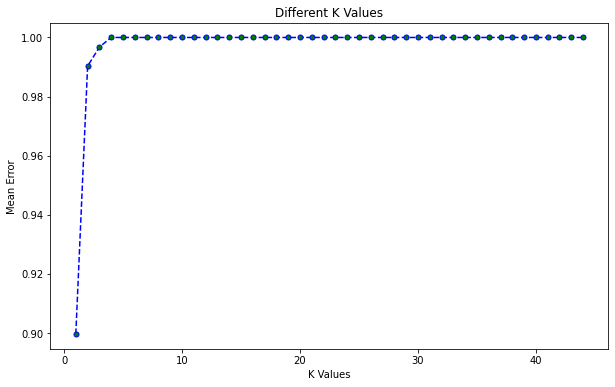

In [90]:
plt.figure(figsize=(10,6))
plt.plot(range(1,45), diff_k, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=5)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean Error')

In [91]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [92]:
predictions = model.predict(X_test)

In [93]:
model.score(X_train, y_train)

0.9075702785732312

In [94]:
acc_KNN = r2_score(y_test, predictions)
print(acc_KNN)

0.7539494934126327


In [95]:
mean_squared_error(y_test, predictions)

64.49160909744695

In [96]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'Accuracy':[acc_KNN]}, index={'7'})
results = pd.concat([results, KNN_df])
results = results[['Algorithm', 'Accuracy']]
print(results)

                         Algorithm  Accuracy
1                    Random Forest  0.879073
2   Random Forest Regressor K_Fold  0.761977
3      Gradient Boosting Regressor  0.880062
4  Gradient Boost Regressor K_Fold  0.769458
5           Ada Boosting Regressor  0.745181
6    Ada Boosting Regressor K_Fold  0.579444
7                    KNN Regressor  0.753949


#### KFold Variation :

In [97]:
k = 20
kfold = KFold(n_splits=k, random_state=70)
results_5 = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(abs(results_5))
print(accuracy) 

0.6907106255855276


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [98]:
KNN_KFold_df = pd.DataFrame({'Algorithm':['KNN Regressor K_Fold'], 'Accuracy':[accuracy]}, index={'8'})
results = pd.concat([results, KNN_KFold_df])
results = results[['Algorithm', 'Accuracy']]
print(results)

                         Algorithm  Accuracy
1                    Random Forest  0.879073
2   Random Forest Regressor K_Fold  0.761977
3      Gradient Boosting Regressor  0.880062
4  Gradient Boost Regressor K_Fold  0.769458
5           Ada Boosting Regressor  0.745181
6    Ada Boosting Regressor K_Fold  0.579444
7                    KNN Regressor  0.753949
8             KNN Regressor K_Fold  0.690711


In [99]:
results.drop_duplicates(inplace=True, keep=False)

In [100]:
results

,Algorithm,Accuracy
1,Random Forest,0.879073
2,Random Forest Regressor K_Fold,0.761977
3,Gradient Boosting Regressor,0.880062
4,Gradient Boost Regressor K_Fold,0.769458
5,Ada Boosting Regressor,0.745181
6,Ada Boosting Regressor K_Fold,0.579444
7,KNN Regressor,0.753949
8,KNN Regressor K_Fold,0.690711


### Bagging Regressor :

In [101]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [102]:
predictions = model.predict(X_test)

In [103]:
model.score(X_train, y_train)

0.9757499196541247

In [104]:
acc_B = r2_score(y_test, predictions)
print(acc_B)

0.8756924678736195


In [105]:
mean_squared_error(y_test, predictions)

32.58189906191584

In [106]:
bagging_df = pd.DataFrame({'Algorithm':['Bagging Regressor'], 'Accuracy':[acc_B]}, index=['9'])
results = pd.concat([results, bagging_df])
results = results[['Algorithm', 'Accuracy']]
print(results)

                         Algorithm  Accuracy
1                    Random Forest  0.879073
2   Random Forest Regressor K_Fold  0.761977
3      Gradient Boosting Regressor  0.880062
4  Gradient Boost Regressor K_Fold  0.769458
5           Ada Boosting Regressor  0.745181
6    Ada Boosting Regressor K_Fold  0.579444
7                    KNN Regressor  0.753949
8             KNN Regressor K_Fold  0.690711
9                Bagging Regressor  0.875692


#### KFold Cross Variation :

In [107]:
k = 20

kfold = KFold(n_splits=k, random_state=70)
results_6 = cross_val_score(model, X, y, cv=kfold)
accuarcy = np.mean(abs(results_6))
print(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.6907106255855276


In [108]:
bagging_KFold_df = pd.DataFrame({'Algorithm':['Bagging Regressor K_Fold'], 'Accuracy':[accuracy]}, index={'10'})
results = pd.concat([results, bagging_KFold_df])
results = results[['Algorithm', 'Accuracy']]
print(results)

                          Algorithm  Accuracy
1                     Random Forest  0.879073
2    Random Forest Regressor K_Fold  0.761977
3       Gradient Boosting Regressor  0.880062
4   Gradient Boost Regressor K_Fold  0.769458
5            Ada Boosting Regressor  0.745181
6     Ada Boosting Regressor K_Fold  0.579444
7                     KNN Regressor  0.753949
8              KNN Regressor K_Fold  0.690711
9                 Bagging Regressor  0.875692
10         Bagging Regressor K_Fold  0.690711


### Support Vector Regressor :

In [109]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [110]:
predictions = model.predict(X_test)

In [111]:
model.score(X_train, y_train)

0.7296525761559518

In [112]:
acc_V = r2_score(y_test, predictions)
print(acc_V)

0.6549962611822544


In [113]:
mean_squared_error(y_test, predictions)

90.42796363067555

In [114]:
SVR_df = pd.DataFrame({'Algorithm':['Support Vector Regression'], 'Accuracy':[acc_V]}, index={'11'})
results = pd.concat([results, SVR_df])
results = results[['Algorithm', 'Accuracy']]
print(results)

                          Algorithm  Accuracy
1                     Random Forest  0.879073
2    Random Forest Regressor K_Fold  0.761977
3       Gradient Boosting Regressor  0.880062
4   Gradient Boost Regressor K_Fold  0.769458
5            Ada Boosting Regressor  0.745181
6     Ada Boosting Regressor K_Fold  0.579444
7                     KNN Regressor  0.753949
8              KNN Regressor K_Fold  0.690711
9                 Bagging Regressor  0.875692
10         Bagging Regressor K_Fold  0.690711
11        Support Vector Regression  0.654996


#### KFold Cross Variation :




In [115]:
k = 10
kfold = KFold(n_splits=k, random_state=70)
results_7 = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(abs(results_7))
print(accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.6685376577727407


In [116]:
SVR_KFold_df = pd.DataFrame({'Algorithm':['SVR K_Fold'], 'Accuracy':[accuracy]}, index={'12'})
results = pd.concat([results, SVR_KFold_df])
results = results[['Algorithm', 'Accuracy']]
print(results)

                          Algorithm  Accuracy
1                     Random Forest  0.879073
2    Random Forest Regressor K_Fold  0.761977
3       Gradient Boosting Regressor  0.880062
4   Gradient Boost Regressor K_Fold  0.769458
5            Ada Boosting Regressor  0.745181
6     Ada Boosting Regressor K_Fold  0.579444
7                     KNN Regressor  0.753949
8              KNN Regressor K_Fold  0.690711
9                 Bagging Regressor  0.875692
10         Bagging Regressor K_Fold  0.690711
11        Support Vector Regression  0.654996
12                       SVR K_Fold  0.668538


### XGBoost Regressor :

In [117]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

xgr = XGBRegressor()

xgr.fit(X_train, y_train)

[10:17:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [118]:
predictions = xgr.predict(X_test)

In [119]:
xgr.score(X_train, y_train)

0.9441437766049378

In [120]:
acc_XGB = r2_score(y_test, predictions)
print(acc_XGB)

0.8818060857485882


In [121]:
mean_squared_error(y_test, predictions)

30.979475804869445

In [122]:
XGB_df = pd.DataFrame({'Algorithm':['XGBoost'], 'Accuracy':[acc_XGB]}, index={'13'})
results = pd.concat([results, XGB_df])
results = results[['Algorithm', 'Accuracy']]
print(results)

                          Algorithm  Accuracy
1                     Random Forest  0.879073
2    Random Forest Regressor K_Fold  0.761977
3       Gradient Boosting Regressor  0.880062
4   Gradient Boost Regressor K_Fold  0.769458
5            Ada Boosting Regressor  0.745181
6     Ada Boosting Regressor K_Fold  0.579444
7                     KNN Regressor  0.753949
8              KNN Regressor K_Fold  0.690711
9                 Bagging Regressor  0.875692
10         Bagging Regressor K_Fold  0.690711
11        Support Vector Regression  0.654996
12                       SVR K_Fold  0.668538
13                          XGBoost  0.881806


### Decision Tree Regression :

In [123]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [124]:
# Feature Importance

print('Feature Importance : \n', pd.DataFrame(dec_model.feature_importances_, columns=['Importance'], index=X_train.columns))


Feature Importance : 
               Importance
cement          0.308837
slag            0.058879
ash             0.009278
water           0.125200
superplastic    0.047707
coarseagg       0.026435
fineagg         0.049828
age             0.373836


In [125]:
predictions = dec_model.predict(X_test)

In [126]:
dec_model.score(X_train, y_train)

0.9930841416603411

In [127]:
acc_DT = r2_score(y_test, predictions)
print(acc_DT)

0.7638887764995979


In [128]:
mean_squared_error(y_test, predictions)

61.886451447321114

In [129]:
DT_df = pd.DataFrame({'Algorithm':['Decision Tree'], 'Accuracy':[acc_DT]}, index={'14'})
results = pd.concat([results, DT_df])
results = results[['Algorithm', 'Accuracy']]
print(results)

                          Algorithm  Accuracy
1                     Random Forest  0.879073
2    Random Forest Regressor K_Fold  0.761977
3       Gradient Boosting Regressor  0.880062
4   Gradient Boost Regressor K_Fold  0.769458
5            Ada Boosting Regressor  0.745181
6     Ada Boosting Regressor K_Fold  0.579444
7                     KNN Regressor  0.753949
8              KNN Regressor K_Fold  0.690711
9                 Bagging Regressor  0.875692
10         Bagging Regressor K_Fold  0.690711
11        Support Vector Regression  0.654996
12                       SVR K_Fold  0.668538
13                          XGBoost  0.881806
14                    Decision Tree  0.763889


#### KFold Cross Variation :

In [130]:
k = 18
kfold = KFold(n_splits=k, random_state=70)
results_7 = cross_val_score(dec_model, X, y, cv=kfold)
accuracy = np.mean(abs(results_7))

print(accuarcy)

0.7547552397963327


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [131]:
Dec_KFold_df = pd.DataFrame({'Algorithm':['Decision Tree K_Fold'], 'Accuracy':[accuarcy]}, index={'15'})
results = pd.concat([results, Dec_KFold_df])
results = results[['Algorithm', 'Accuracy']]
print(results)

                          Algorithm  Accuracy
1                     Random Forest  0.879073
2    Random Forest Regressor K_Fold  0.761977
3       Gradient Boosting Regressor  0.880062
4   Gradient Boost Regressor K_Fold  0.769458
5            Ada Boosting Regressor  0.745181
6     Ada Boosting Regressor K_Fold  0.579444
7                     KNN Regressor  0.753949
8              KNN Regressor K_Fold  0.690711
9                 Bagging Regressor  0.875692
10         Bagging Regressor K_Fold  0.690711
11        Support Vector Regression  0.654996
12                       SVR K_Fold  0.668538
13                          XGBoost  0.881806
14                    Decision Tree  0.763889
15             Decision Tree K_Fold  0.754755


In [133]:
# Creating a copy of Dataframe to drop least important features and work on only important ones.

dataset_2 = dataset.copy()
print('Feature Imporatnce : \n', pd.DataFrame(dec_model.feature_importances_, columns=['Importance'], index=X_train.columns))

Feature Imporatnce : 
               Importance
cement          0.308837
slag            0.058879
ash             0.009278
water           0.125200
superplastic    0.047707
coarseagg       0.026435
fineagg         0.049828
age             0.373836


In [134]:
X = dataset_2.drop(['strength', 'ash', 'coarseagg', 'fineagg'], axis=1)
y = dataset_2['strength']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 70)

In [136]:
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [137]:
new_dec_model = DecisionTreeRegressor()
new_dec_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [138]:
print('Feature Importance according to the new Decision Tree model : \n',
      pd.DataFrame(new_dec_model.feature_importances_, columns=['Importance'], index=X_train.columns))

Feature Importance according to the new Decision Tree model : 
               Importance
cement          0.393623
slag            0.103565
water           0.134298
superplastic    0.061501
age             0.307014


In [139]:
predictions = new_dec_model.predict(X_test)

In [140]:
new_dec_model.score(X_train, y_train)

0.9926587240676287

In [143]:
acc_DT2 = r2_score(y_test, predictions)

In [142]:
mean_squared_error(y_test, predictions)

59.856701233818775

In [144]:
dec_df1 = pd.DataFrame({'Algorithm':['Decision Tree2'], 'Accuracy':[acc_DT2]}, index={'16'})
results = pd.concat([results, dec_df1])
results = results[['Algorithm', 'Accuracy']]
print(results)

                          Algorithm  Accuracy
1                     Random Forest  0.879073
2    Random Forest Regressor K_Fold  0.761977
3       Gradient Boosting Regressor  0.880062
4   Gradient Boost Regressor K_Fold  0.769458
5            Ada Boosting Regressor  0.745181
6     Ada Boosting Regressor K_Fold  0.579444
7                     KNN Regressor  0.753949
8              KNN Regressor K_Fold  0.690711
9                 Bagging Regressor  0.875692
10         Bagging Regressor K_Fold  0.690711
11        Support Vector Regression  0.654996
12                       SVR K_Fold  0.668538
13                          XGBoost  0.881806
14                    Decision Tree  0.763889
15             Decision Tree K_Fold  0.754755
16                   Decision Tree2  0.772078


### Decision Tree with Hyperparameter Tuning :

In [145]:
# Creating the training and test set again, as it has been overridden

X = dataset.drop(['strength'], axis=1)
y = dataset['strength']

In [146]:
Xscaled = X.apply(zscore)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.3, random_state=70)

In [149]:
dec_prun_model = DecisionTreeRegressor(max_depth = 4, random_state = 1, min_samples_leaf = 5)
dec_prun_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [150]:
print('Feature Importance for Decision Tree with Hypertuning : \n',
      pd.DataFrame(dec_prun_model.feature_importances_, columns=['Importance'], index=X_train.columns))

Feature Importance for Decision Tree with Hypertuning : 
               Importance
cement          0.424405
slag            0.033236
ash             0.000000
water           0.118454
superplastic    0.027213
coarseagg       0.000000
fineagg         0.020382
age             0.376311


In [151]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [152]:
Xscaled_df = pd.DataFrame(Xscaled, columns=dataset.columns)
Xscaled_df = Xscaled_df.drop('strength', axis=1)
feature_cols = Xscaled_df.columns


In [153]:
feature_cols

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

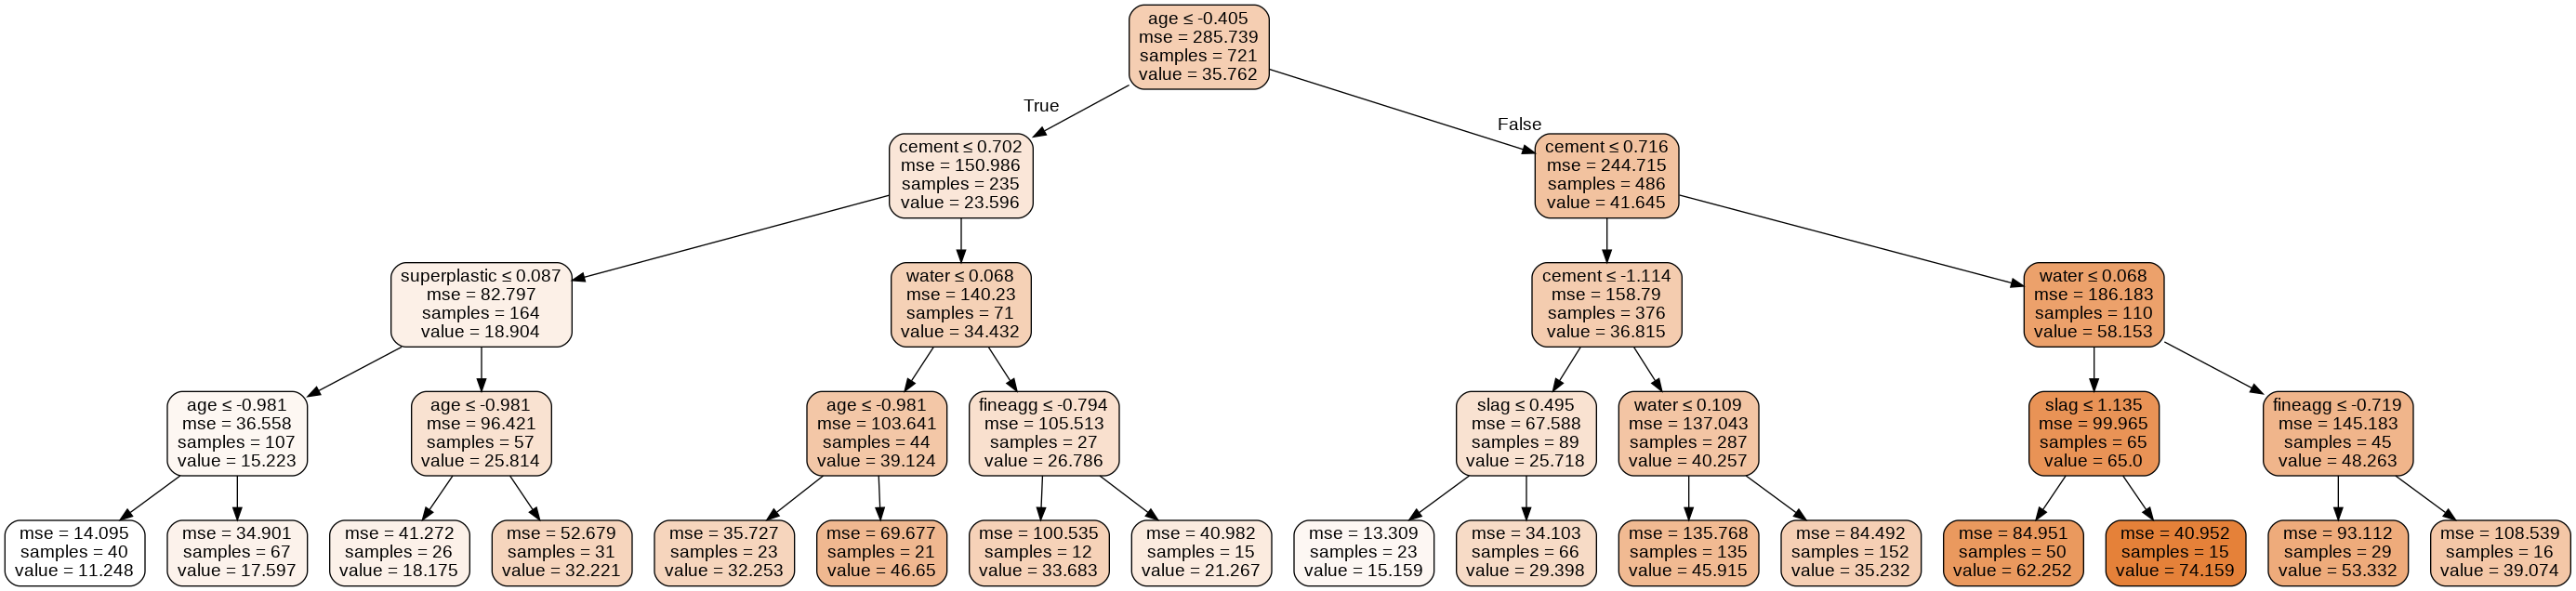

In [155]:
dot_data = StringIO()
export_graphviz(dec_prun_model, out_file=dot_data,
                filled=True, rounded = True,
                special_characters = True, feature_names = feature_cols,
                class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

In [156]:
predictions = dec_prun_model.predict(X_test)

In [157]:
dec_prun_model.score(X_train, y_train)

0.7439965793696546

In [158]:
acc_DecT = r2_score(y_test, predictions)
print(acc_DecT)

0.6638484528965349


In [159]:
dec_prun_model.score(X_test, y_test)

0.6638484528965349

In [160]:
mean_squared_error(y_test, predictions)

88.28002112664025

In [161]:
DecT_df = pd.DataFrame({'Algorithm':['Pruned Decision Tree'], 'Accuracy':[acc_DecT]}, index={'17'})
results = pd.concat([results, DecT_df])
results = results[['Algorithm', 'Accuracy']]
print(results)

                          Algorithm  Accuracy
1                     Random Forest  0.879073
2    Random Forest Regressor K_Fold  0.761977
3       Gradient Boosting Regressor  0.880062
4   Gradient Boost Regressor K_Fold  0.769458
5            Ada Boosting Regressor  0.745181
6     Ada Boosting Regressor K_Fold  0.579444
7                     KNN Regressor  0.753949
8              KNN Regressor K_Fold  0.690711
9                 Bagging Regressor  0.875692
10         Bagging Regressor K_Fold  0.690711
11        Support Vector Regression  0.654996
12                       SVR K_Fold  0.668538
13                          XGBoost  0.881806
14                    Decision Tree  0.763889
15             Decision Tree K_Fold  0.754755
16                   Decision Tree2  0.772078
17             Pruned Decision Tree  0.663848


#### KFold Cross Variation :

In [162]:
k = 20

kfold = KFold(n_splits=k, random_state=70)
results_8 = cross_val_score(dec_prun_model, X, y, cv=kfold)
accuracy = np.mean(abs(results_8))
print(accuracy)

0.44792037352404224


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [166]:
decT_KFold_df = pd.DataFrame({'Algorithm':['Pruned Decision Tree K_Fold'], 'Accuracy':[accuracy]}, index={'18'})
results = pd.concat([results, decT_KFold_df])
results = results[['Algorithm', 'Accuracy']]
print(results)

                          Algorithm  Accuracy
1                     Random Forest  0.879073
2    Random Forest Regressor K_Fold  0.761977
3       Gradient Boosting Regressor  0.880062
4   Gradient Boost Regressor K_Fold  0.769458
5            Ada Boosting Regressor  0.745181
6     Ada Boosting Regressor K_Fold  0.579444
7                     KNN Regressor  0.753949
8              KNN Regressor K_Fold  0.690711
9                 Bagging Regressor  0.875692
10         Bagging Regressor K_Fold  0.690711
11        Support Vector Regression  0.654996
12                       SVR K_Fold  0.668538
13                          XGBoost  0.881806
14                    Decision Tree  0.763889
15             Decision Tree K_Fold  0.754755
16                   Decision Tree2  0.772078
17             Pruned Decision Tree  0.663848
18      Pruned Decision Tree K_Fold  0.447920
18      Pruned Decision Tree K_Fold  0.447920


**NOTE** : We can use 'GridSearchCV' for getting the best hyperparameters.